## Q1: Sampling from Chi-Squared using Rejection Sampling

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def p(x, nu):
    return x ** (nu / 2 - 1) * np.exp(-x / 2) / (2 ** (nu / 2) * np.math.factorial(int(nu / 2) - 1))

def q(x, lam):
    return lam * np.exp(-lam * x)

nu = 4
lam = 1 / nu
M = nu ** (nu / 2) * np.exp(-nu / 2 + 1) / (2 ** (nu / 2) * np.math.factorial(int(nu / 2) - 1))

n = 100000
x_accepted = np.array([])
count = 0

for i in range(n):
    u_1 = np.random.uniform(0, 1)
    x_proposed = -(1/lam) * np.log(1 - u_1)
    a = p(x_proposed, nu) / (M * q(x_proposed, lam))
    u_2 = np.random.uniform(0, 1)
    if u_2 <= a:
        x_accepted = np.append(x_accepted, x_proposed)
        count += 1

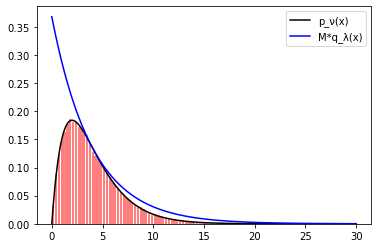

In [14]:
xx = np.linspace(0, 30, 1000)
chi_squared_density = xx ** (nu / 2 - 1) * np.exp(-xx / 2) / (2 ** (nu / 2) * np.math.factorial(int(nu / 2) - 1))
M_q_density = M * lam * np.exp(-lam * xx)
plt.hist(x_accepted, bins=100, density=True, rwidth=0.8, color='r', alpha=0.5)
plt.plot(xx, chi_squared_density, 'k-', label='p_ν(x)')
plt.plot(xx, M_q_density, 'b-', label='M*q_λ(x)')
plt.legend()
plt.show()

In [15]:
a_hat = 1 / M
a = count / n
a - a_hat

-0.00040045711476122126

## Q2: Sample from a Mixture of Chi-Squared

In [5]:
def chi_squared_sample(nu, n):
    lam = 1 / nu
    M = nu ** (nu / 2) * np.exp(-nu / 2 + 1) / (2 ** (nu / 2) * np.math.factorial(int(nu / 2) - 1))
    x_accepted = np.array([])
    while len(x_accepted) < n:
        u_1 = np.random.uniform(0, 1)
        x_proposed = -(1/lam) * np.log(1 - u_1)
        a = p(x_proposed, nu) / (M * q(x_proposed, lam))
        u_2 = np.random.uniform(0, 1)
        if u_2 <= a:
            x_accepted = np.append(x_accepted, x_proposed)
    return x_accepted

In [6]:
def discrete(w, s):
    cw = np.cumsum(w)
    u = np.random.uniform(0, 1)
    for k in range(len(cw)):
        if cw[k] > u:
            discrete_sample = s[k]
            break
    return discrete_sample

w = np.array([0.2, 0.5, 0.3])
s = np.array([0, 1, 2])
nu = np.array([4, 16, 40])

n = 100000
sample = np.array([])

for i in range(n):
    discrete_sample = discrete(w, s)
    x = chi_squared_sample(nu[discrete_sample], 1)
    sample = np.append(sample, x)

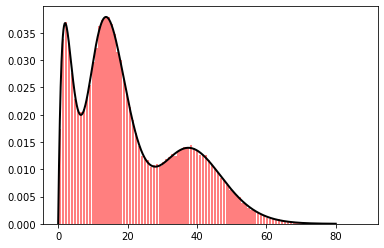

In [7]:
def mixture_density(x, w, nu):
    return w[0] * p(x, nu[0]) + w[1] * p(x, nu[1]) + w[2] * p(x, nu[2])

xx = np.linspace(0, 80, 1000)
plt.plot(xx, mixture_density(xx, w, nu), color='k', linewidth=2)
plt.hist(sample, bins=100, density=True, rwidth=0.8, color='r', alpha=0.5)
plt.show()